# House Price Prediction - Advanced regression Assignment

In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Data Understanding and Prepration

In [2]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [4]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [5]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [8]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [12]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [13]:
#Drop Alley column because more than 90% values are missing or No Alley
house_data=house_data.drop(columns=['Alley'])

In [14]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [15]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [16]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [17]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [18]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [19]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [20]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [21]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [22]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [23]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [24]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [25]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [26]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [27]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [28]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [29]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [30]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [31]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [32]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [33]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [34]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [35]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [36]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [37]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [38]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [39]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [40]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [41]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [42]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [43]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [44]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [45]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [46]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])


In [47]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [48]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


# Create Dummy Varibales

In [49]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [50]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [51]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [53]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [54]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [55]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [56]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [57]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [59]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [61]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [62]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [63]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [64]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [65]:
house_data.shape


(1460, 162)

In [66]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [67]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


# Prepairing Data For Modeling

In [68]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [69]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

# Rescaling The Numeric Factors

In [70]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [71]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,

# Training The Model

In [72]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [73]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

# RFE- Recursive Feature Elimination


In [74]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)


In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 63),
 ('LotArea', False, 22),
 ('OverallQual', True, 1),
 ('OverallCond', False, 51),
 ('YearRemodAdd', False, 85),
 ('MasVnrArea', False, 111),
 ('ExterQual', False, 76),
 ('BsmtQual', False, 13),
 ('BsmtExposure', False, 6),
 ('BsmtFinType1', False, 58),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 107),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 49),
 ('BsmtHalfBath', False, 74),
 ('FullBath', False, 71),
 ('HalfBath', False, 108),
 ('BedroomAbvGr', False, 80),
 ('KitchenAbvGr', False, 96),
 ('KitchenQual', False, 7),
 ('TotRmsAbvGrd', False, 82),
 ('Fireplaces', False, 86),
 ('FireplaceQu', False, 77),
 ('GarageYrBlt', False, 88),
 ('GarageCars', True, 1),
 ('GarageArea', False, 94),
 ('WoodDeckSF', False, 89),
 ('OpenPorchSF', False, 102),
 ('EnclosedPorch', False, 109),
 ('3SsnPorch', False, 84)

In [76]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'MSSubClass_75', 'MSSubClass_160', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_Unf'], dtype='object')

In [77]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn'], dtype='object', length=113)

# Building model using statsmodel, for the detailed statistics

In [78]:
#creatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [79]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [80]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [81]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:23   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     990   BIC:                         2.439e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.736e+05   3050.312     56.904      0.000    1.68e+05     1.8e+05
OverallQual           2.654e+04   1798.396     14.757      0.000     2.3e+04    3.01e+04
BsmtFinSF1            7095.9649    935.171      7.588      0.000    5260.820    8931.109
BsmtFinSF2            1957.2709   1063.784      1.840      0.066    -130.260    4044.802
BsmtUnfSF            -2157.7752    937.516     -2.302      0.022   -3997.523    -318.028
TotalBsmtSF           5808.2521   1389.467      4.180      0.000    3081.613    8534.891
1stFlrSF              4668.7545   1780.925      2.622      0.009    1173.933    8163.576
2ndFlrSF              1.453e+04   1956.395      7.426      0.000    1.07e+04    1.84e+04
LowQualFinSF         -1564.4786   1228.990     -1.273      0.203   -3976.204     847.247
GrLivArea             1.525e+04   1116.069     13.661      0.000    1.31e+04    1.74e+04
GarageCars            1.383e+04   1717.195      8.053      0.000    1.05e+04    1.72e+04
MSSubClass_75         2.561e+04   2.05e+04      1.250      0.212   -1.46e+04    6.58e+04
MSSubClass_160       -2.539e+04   6125.680     -4.145      0.000   -3.74e+04   -1.34e+04
LotShape_IR3         -2.965e+04   1.18e+04     -2.522      0.012   -5.27e+04   -6577.829
LotConfig_CulDSac      1.78e+04   4456.044      3.994      0.000    9052.614    2.65e+04
LotConfig_FR3        -2.146e+04   1.99e+04     -1.081      0.280   -6.04e+04    1.75e+04
Neighborhood_Crawfor  3.364e+04   6395.413      5.260      0.000    2.11e+04    4.62e+04
Neighborhood_NoRidge  5.229e+04   6732.466      7.767      0.000    3.91e+04    6.55e+04
Neighborhood_NridgHt  4.976e+04   5346.848      9.307      0.000    3.93e+04    6.03e+04
Neighborhood_Somerst  2.709e+04   5164.663      5.246      0.000     1.7e+04    3.72e+04
Neighborhood_StoneBr  2.147e+04   9921.955      2.164      0.031    2000.679    4.09e+04
HouseStyle_1Story     1.356e+04   3772.963      3.594      0.000    6156.938     2.1e+04
HouseStyle_2.5Fin    -3.256e+04   2.22e+04     -1.468      0.142   -7.61e+04     1.1e+04
HouseStyle_2.5Unf    -5.772e+04   2.19e+04     -2.632      0.009   -1.01e+05   -1.47e+04
HouseStyle_2Story    -1.029e+04   4759.160     -2.161      0.031   -1.96e+04    -947.269
Exterior1st_AsphShn  -1.394e+04   1.76e+04     -0.794      0.427   -4.84e+04    2.05e+04
Exterior1st_CBlock   -4797.1240   1.72e+04     -0.279      0.780   -3.85e+04    2.89e+04
Exterior1st_ImStucc  -9.034e+04    3.7e+04     -2.442      0.015   -1.63e+05   -1.77e+04
Exterior2nd_AsphShn  -1.394e+04   1.76e+04     -0.794      0.427   -4.84e+04    2.05e+04
Exterior2nd_BrkFace   1.765e+04   8797.519      2.006      0.045     384.260    3.49e+04
Exterior2nd_CBlock   -4797.1240   1.72e+04     -0.279      0.780   -3.85e+04    2.89e+04
Exterior2nd_ImStucc   3.303e+04    1.3e+04      2.533    

In [82]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
26,Exterior1st_CBlock,inf
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
6,1stFlrSF,inf
7,2ndFlrSF,inf
8,LowQualFinSF,inf
9,GrLivArea,inf
25,Exterior1st_AsphShn,inf


# ___GarageType_NA has higher p-value. Lets drop it.___


In [83]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [84]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'MSSubClass_75', 'MSSubClass_160', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageFinish_NA', 'GarageFinish_Unf'], dtype='object')

# ___Rebuild the model without GarageType_NA___

In [85]:
X_train_lm = sm.add_constant(X_train_new)

In [86]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [87]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:24   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     990   BIC:                         2.439e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.736e+05   3050.312     56.904      0.000    1.68e+05     1.8e+05
OverallQual           2.654e+04   1798.396     14.757      0.000     2.3e+04    3.01e+04
BsmtFinSF1            7095.9649    935.171      7.588      0.000    5260.820    8931.109
BsmtFinSF2            1957.2709   1063.784      1.840      0.066    -130.260    4044.802
BsmtUnfSF            -2157.7752    937.516     -2.302      0.022   -3997.523    -318.028
TotalBsmtSF           5808.2521   1389.467      4.180      0.000    3081.613    8534.891
1stFlrSF              4668.7545   1780.925      2.622      0.009    1173.933    8163.576
2ndFlrSF              1.453e+04   1956.395      7.426      0.000    1.07e+04    1.84e+04
LowQualFinSF         -1564.4786   1228.990     -1.273      0.203   -3976.204     847.247
GrLivArea             1.525e+04   1116.069     13.661      0.000    1.31e+04    1.74e+04
GarageCars            1.383e+04   1717.195      8.053      0.000    1.05e+04    1.72e+04
MSSubClass_75         2.561e+04   2.05e+04      1.250      0.212   -1.46e+04    6.58e+04
MSSubClass_160       -2.539e+04   6125.680     -4.145      0.000   -3.74e+04   -1.34e+04
LotShape_IR3         -2.965e+04   1.18e+04     -2.522      0.012   -5.27e+04   -6577.829
LotConfig_CulDSac      1.78e+04   4456.044      3.994      0.000    9052.614    2.65e+04
LotConfig_FR3        -2.146e+04   1.99e+04     -1.081      0.280   -6.04e+04    1.75e+04
Neighborhood_Crawfor  3.364e+04   6395.413      5.260      0.000    2.11e+04    4.62e+04
Neighborhood_NoRidge  5.229e+04   6732.466      7.767      0.000    3.91e+04    6.55e+04
Neighborhood_NridgHt  4.976e+04   5346.848      9.307      0.000    3.93e+04    6.03e+04
Neighborhood_Somerst  2.709e+04   5164.663      5.246      0.000     1.7e+04    3.72e+04
Neighborhood_StoneBr  2.147e+04   9921.955      2.164      0.031    2000.679    4.09e+04
HouseStyle_1Story     1.356e+04   3772.963      3.594      0.000    6156.938     2.1e+04
HouseStyle_2.5Fin    -3.256e+04   2.22e+04     -1.468      0.142   -7.61e+04     1.1e+04
HouseStyle_2.5Unf    -5.772e+04   2.19e+04     -2.632      0.009   -1.01e+05   -1.47e+04
HouseStyle_2Story    -1.029e+04   4759.160     -2.161      0.031   -1.96e+04    -947.269
Exterior1st_AsphShn  -1.394e+04   1.76e+04     -0.794      0.427   -4.84e+04    2.05e+04
Exterior1st_CBlock   -4797.1240   1.72e+04     -0.279      0.780   -3.85e+04    2.89e+04
Exterior1st_ImStucc  -9.034e+04    3.7e+04     -2.442      0.015   -1.63e+05   -1.77e+04
Exterior2nd_AsphShn  -1.394e+04   1.76e+04     -0.794      0.427   -4.84e+04    2.05e+04
Exterior2nd_BrkFace   1.765e+04   8797.519      2.006      0.045     384.260    3.49e+04
Exterior2nd_CBlock   -4797.1240   1.72e+04     -0.279      0.780   -3.85e+04    2.89e+04
Exterior2nd_ImStucc   3.303e+04    1.3e+04      2.533    

# __Exterior1st_CBlock has higher p-value. Lets drop it.___

In [88]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

# ___Rebuild the model without Exterior1st_CBlock___

In [89]:
X_train_lm = sm.add_constant(X_train_new)

In [90]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [91]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:25   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     990   BIC:                         2.439e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.736e+05   3050.312     56.904      0.000    1.68e+05     1.8e+05
OverallQual           2.654e+04   1798.396     14.757      0.000     2.3e+04    3.01e+04
BsmtFinSF1            7095.9649    935.171      7.588      0.000    5260.820    8931.109
BsmtFinSF2            1957.2709   1063.784      1.840      0.066    -130.260    4044.802
BsmtUnfSF            -2157.7752    937.516     -2.302      0.022   -3997.523    -318.028
TotalBsmtSF           5808.2521   1389.467      4.180      0.000    3081.613    8534.891
1stFlrSF              4668.7545   1780.925      2.622      0.009    1173.933    8163.576
2ndFlrSF              1.453e+04   1956.395      7.426      0.000    1.07e+04    1.84e+04
LowQualFinSF         -1564.4786   1228.990     -1.273      0.203   -3976.204     847.247
GrLivArea             1.525e+04   1116.069     13.661      0.000    1.31e+04    1.74e+04
GarageCars            1.383e+04   1717.195      8.053      0.000    1.05e+04    1.72e+04
MSSubClass_75         2.561e+04   2.05e+04      1.250      0.212   -1.46e+04    6.58e+04
MSSubClass_160       -2.539e+04   6125.680     -4.145      0.000   -3.74e+04   -1.34e+04
LotShape_IR3         -2.965e+04   1.18e+04     -2.522      0.012   -5.27e+04   -6577.829
LotConfig_CulDSac      1.78e+04   4456.044      3.994      0.000    9052.614    2.65e+04
LotConfig_FR3        -2.146e+04   1.99e+04     -1.081      0.280   -6.04e+04    1.75e+04
Neighborhood_Crawfor  3.364e+04   6395.413      5.260      0.000    2.11e+04    4.62e+04
Neighborhood_NoRidge  5.229e+04   6732.466      7.767      0.000    3.91e+04    6.55e+04
Neighborhood_NridgHt  4.976e+04   5346.848      9.307      0.000    3.93e+04    6.03e+04
Neighborhood_Somerst  2.709e+04   5164.663      5.246      0.000     1.7e+04    3.72e+04
Neighborhood_StoneBr  2.147e+04   9921.955      2.164      0.031    2000.679    4.09e+04
HouseStyle_1Story     1.356e+04   3772.963      3.594      0.000    6156.938     2.1e+04
HouseStyle_2.5Fin    -3.256e+04   2.22e+04     -1.468      0.142   -7.61e+04     1.1e+04
HouseStyle_2.5Unf    -5.772e+04   2.19e+04     -2.632      0.009   -1.01e+05   -1.47e+04
HouseStyle_2Story    -1.029e+04   4759.160     -2.161      0.031   -1.96e+04    -947.269
Exterior1st_AsphShn  -1.394e+04   1.76e+04     -0.794      0.427   -4.84e+04    2.05e+04
Exterior1st_ImStucc  -9.034e+04    3.7e+04     -2.442      0.015   -1.63e+05   -1.77e+04
Exterior2nd_AsphShn  -1.394e+04   1.76e+04     -0.794      0.427   -4.84e+04    2.05e+04
Exterior2nd_BrkFace   1.765e+04   8797.519      2.006      0.045     384.260    3.49e+04
Exterior2nd_CBlock   -9594.2480   3.44e+04     -0.279      0.780   -7.71e+04    5.79e+04
Exterior2nd_ImStucc   3.303e+04    1.3e+04      2.533      0.011    7441.273    5.86e+04
Exterior2nd_Stucco   -3.472e+04   8072.951     -4.301    

# _Exterior2nd_CBlock has higher p-value. Lets drop it._

In [92]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

# ___Rebuild the model without Exterior2nd_CBlock___

In [93]:
X_train_lm = sm.add_constant(X_train_new)

In [94]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [95]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     155.4
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:25   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     991   BIC:                         2.439e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.735e+05   3035.002     57.164      0.000    1.68e+05    1.79e+05
OverallQual           2.657e+04   1793.367     14.818      0.000    2.31e+04    3.01e+04
BsmtFinSF1            7091.6339    934.607      7.588      0.000    5257.598    8925.669
BsmtFinSF2            1953.8361   1063.218      1.838      0.066    -132.581    4040.253
BsmtUnfSF            -2164.5999    936.761     -2.311      0.021   -4002.863    -326.337
TotalBsmtSF           5795.9153   1388.117      4.175      0.000    3071.929    8519.902
1stFlrSF              4686.0828   1779.014      2.634      0.009    1195.016    8177.149
2ndFlrSF               1.45e+04   1953.105      7.425      0.000    1.07e+04    1.83e+04
LowQualFinSF         -1561.0429   1228.357     -1.271      0.204   -3971.522     849.436
GrLivArea             1.524e+04   1115.108     13.665      0.000    1.31e+04    1.74e+04
GarageCars            1.384e+04   1715.633      8.069      0.000    1.05e+04    1.72e+04
MSSubClass_75         2.558e+04   2.05e+04      1.250      0.212   -1.46e+04    6.58e+04
MSSubClass_160       -2.541e+04   6122.160     -4.151      0.000   -3.74e+04   -1.34e+04
LotShape_IR3         -2.965e+04   1.18e+04     -2.522      0.012   -5.27e+04   -6580.121
LotConfig_CulDSac      1.78e+04   4453.959      3.996      0.000    9059.580    2.65e+04
LotConfig_FR3        -2.146e+04   1.98e+04     -1.082      0.280   -6.04e+04    1.75e+04
Neighborhood_Crawfor  3.363e+04   6392.299      5.261      0.000    2.11e+04    4.62e+04
Neighborhood_NoRidge  5.229e+04   6729.328      7.770      0.000    3.91e+04    6.55e+04
Neighborhood_NridgHt  4.973e+04   5343.295      9.308      0.000    3.92e+04    6.02e+04
Neighborhood_Somerst  2.708e+04   5161.833      5.245      0.000    1.69e+04    3.72e+04
Neighborhood_StoneBr  2.145e+04   9916.960      2.163      0.031    1986.361    4.09e+04
HouseStyle_1Story     1.359e+04   3769.262      3.607      0.000    6198.020     2.1e+04
HouseStyle_2.5Fin    -3.246e+04   2.22e+04     -1.464      0.143    -7.6e+04     1.1e+04
HouseStyle_2.5Unf    -5.765e+04   2.19e+04     -2.630      0.009   -1.01e+05   -1.46e+04
HouseStyle_2Story     -1.02e+04   4746.410     -2.149      0.032   -1.95e+04    -883.969
Exterior1st_AsphShn  -1.398e+04   1.75e+04     -0.797      0.426   -4.84e+04    2.05e+04
Exterior1st_ImStucc   -9.04e+04    3.7e+04     -2.444      0.015   -1.63e+05   -1.78e+04
Exterior2nd_AsphShn  -1.398e+04   1.75e+04     -0.797      0.426   -4.84e+04    2.05e+04
Exterior2nd_BrkFace   1.766e+04   8793.357      2.008      0.045     402.081    3.49e+04
Exterior2nd_ImStucc   3.304e+04    1.3e+04      2.535      0.011    7464.838    5.86e+04
Exterior2nd_Stucco   -3.472e+04   8069.194     -4.303      0.000   -5.06e+04   -1.89e+04
GarageFinish_NA       1.386e+04   6514.970      2.128    

In [96]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

# ___Rebuild the model without GrLivArea___

In [97]:
X_train_lm = sm.add_constant(X_train_new)

In [98]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [99]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     155.4
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:26   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     991   BIC:                         2.439e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.735e+05   3035.002     57.164      0.000    1.68e+05    1.79e+05
OverallQual           2.657e+04   1793.367     14.818      0.000    2.31e+04    3.01e+04
BsmtFinSF1            7091.6339    934.607      7.588      0.000    5257.598    8925.669
BsmtFinSF2            1953.8361   1063.218      1.838      0.066    -132.581    4040.253
BsmtUnfSF            -2164.5999    936.761     -2.311      0.021   -4002.863    -326.337
TotalBsmtSF           5795.9153   1388.117      4.175      0.000    3071.929    8519.902
1stFlrSF              1.609e+04   2074.252      7.755      0.000     1.2e+04    2.02e+04
2ndFlrSF              2.698e+04   2585.601     10.434      0.000    2.19e+04    3.21e+04
LowQualFinSF          -179.8089   1235.873     -0.145      0.884   -2605.037    2245.419
GarageCars            1.384e+04   1715.633      8.069      0.000    1.05e+04    1.72e+04
MSSubClass_75         2.558e+04   2.05e+04      1.250      0.212   -1.46e+04    6.58e+04
MSSubClass_160       -2.541e+04   6122.160     -4.151      0.000   -3.74e+04   -1.34e+04
LotShape_IR3         -2.965e+04   1.18e+04     -2.522      0.012   -5.27e+04   -6580.121
LotConfig_CulDSac      1.78e+04   4453.959      3.996      0.000    9059.580    2.65e+04
LotConfig_FR3        -2.146e+04   1.98e+04     -1.082      0.280   -6.04e+04    1.75e+04
Neighborhood_Crawfor  3.363e+04   6392.299      5.261      0.000    2.11e+04    4.62e+04
Neighborhood_NoRidge  5.229e+04   6729.328      7.770      0.000    3.91e+04    6.55e+04
Neighborhood_NridgHt  4.973e+04   5343.295      9.308      0.000    3.92e+04    6.02e+04
Neighborhood_Somerst  2.708e+04   5161.833      5.245      0.000    1.69e+04    3.72e+04
Neighborhood_StoneBr  2.145e+04   9916.960      2.163      0.031    1986.361    4.09e+04
HouseStyle_1Story     1.359e+04   3769.262      3.607      0.000    6198.020     2.1e+04
HouseStyle_2.5Fin    -3.246e+04   2.22e+04     -1.464      0.143    -7.6e+04     1.1e+04
HouseStyle_2.5Unf    -5.765e+04   2.19e+04     -2.630      0.009   -1.01e+05   -1.46e+04
HouseStyle_2Story     -1.02e+04   4746.410     -2.149      0.032   -1.95e+04    -883.969
Exterior1st_AsphShn  -1.398e+04   1.75e+04     -0.797      0.426   -4.84e+04    2.05e+04
Exterior1st_ImStucc   -9.04e+04    3.7e+04     -2.444      0.015   -1.63e+05   -1.78e+04
Exterior2nd_AsphShn  -1.398e+04   1.75e+04     -0.797      0.426   -4.84e+04    2.05e+04
Exterior2nd_BrkFace   1.766e+04   8793.357      2.008      0.045     402.081    3.49e+04
Exterior2nd_ImStucc   3.304e+04    1.3e+04      2.535      0.011    7464.838    5.86e+04
Exterior2nd_Stucco   -3.472e+04   8069.194     -4.303      0.000   -5.06e+04   -1.89e+04
GarageFinish_NA       1.386e+04   6514.970      2.128      0.034    1076.160    2.66e+04
GarageFinish_Unf     -9336.9612   2794.088     -3.342    

# ___Exterior1st_AsphShn has higher p-value. Lets drop it.___



In [100]:
#X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

# ___Rebuild the model without Exterior1st_AsphShn___

In [101]:
#X_train_lm = sm.add_constant(X_train_new)

In [102]:
#Running the Linear Model
#lm = sm.OLS(y_train,X_train_lm).fit()

In [103]:
#check the summary of model
#lm.summary()

# ___LowQualFinSF has higher p-value. Lets drop it.___


In [104]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

# ___Rebuild the model without LowQualFinSF___

In [105]:
X_train_lm = sm.add_constant(X_train_new)

In [106]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [107]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:26   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     992   BIC:                         2.438e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.735e+05   3027.369     57.299      0.000    1.68e+05    1.79e+05
OverallQual           2.657e+04   1792.444     14.824      0.000    2.31e+04    3.01e+04
BsmtFinSF1            7094.2171    933.977      7.596      0.000    5261.420    8927.015
BsmtFinSF2            1944.7488   1060.858      1.833      0.067    -137.035    4026.532
BsmtUnfSF            -2171.3933    935.135     -2.322      0.020   -4006.463    -336.324
TotalBsmtSF           5788.5106   1386.499      4.175      0.000    3067.702    8509.319
1stFlrSF              1.609e+04   2073.229      7.759      0.000     1.2e+04    2.02e+04
2ndFlrSF              2.701e+04   2575.506     10.487      0.000     2.2e+04    3.21e+04
GarageCars            1.385e+04   1714.420      8.077      0.000    1.05e+04    1.72e+04
MSSubClass_75         2.535e+04   2.04e+04      1.243      0.214   -1.47e+04    6.54e+04
MSSubClass_160        -2.54e+04   6118.442     -4.151      0.000   -3.74e+04   -1.34e+04
LotShape_IR3         -2.964e+04   1.17e+04     -2.523      0.012   -5.27e+04   -6590.059
LotConfig_CulDSac     1.781e+04   4450.978      4.002      0.000    9077.597    2.65e+04
LotConfig_FR3        -2.145e+04   1.98e+04     -1.082      0.280   -6.04e+04    1.75e+04
Neighborhood_Crawfor  3.364e+04   6388.904      5.265      0.000    2.11e+04    4.62e+04
Neighborhood_NoRidge  5.227e+04   6724.952      7.773      0.000    3.91e+04    6.55e+04
Neighborhood_NridgHt  4.973e+04   5340.639      9.312      0.000    3.93e+04    6.02e+04
Neighborhood_Somerst  2.706e+04   5158.050      5.246      0.000    1.69e+04    3.72e+04
Neighborhood_StoneBr  2.144e+04   9911.888      2.163      0.031    1987.672    4.09e+04
HouseStyle_1Story     1.368e+04   3720.018      3.678      0.000    6381.365     2.1e+04
HouseStyle_2.5Fin     -3.36e+04   2.07e+04     -1.621      0.105   -7.43e+04    7084.881
HouseStyle_2.5Unf     -5.74e+04   2.18e+04     -2.628      0.009      -1e+05   -1.45e+04
HouseStyle_2Story    -1.019e+04   4743.744     -2.148      0.032   -1.95e+04    -881.147
Exterior1st_AsphShn  -1.393e+04   1.75e+04     -0.795      0.427   -4.83e+04    2.05e+04
Exterior1st_ImStucc  -9.042e+04    3.7e+04     -2.446      0.015   -1.63e+05   -1.79e+04
Exterior2nd_AsphShn  -1.393e+04   1.75e+04     -0.795      0.427   -4.83e+04    2.05e+04
Exterior2nd_BrkFace   1.768e+04   8788.214      2.011      0.045     429.486    3.49e+04
Exterior2nd_ImStucc   3.305e+04    1.3e+04      2.538      0.011    7492.431    5.86e+04
Exterior2nd_Stucco   -3.477e+04   8058.603     -4.314      0.000   -5.06e+04    -1.9e+04
GarageFinish_NA       1.374e+04   6455.725      2.128      0.034    1068.359    2.64e+04
GarageFinish_Unf     -9347.9424   2791.690     -3.348      0.001   -1.48e+04   -3869.646
=========================================================

In [108]:
X_train_new.shape

(1021, 31)

In [109]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
25,Exterior2nd_AsphShn,inf
23,Exterior1st_AsphShn,inf
0,const,8.07
7,2ndFlrSF,5.84
22,HouseStyle_2Story,4.18
6,1stFlrSF,3.78


# ___BsmtFinSF2 has higher p-value and VIF. Lets drop it.___

In [110]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

# ___Rebuild the model without BsmtFinSF2___

In [111]:
X_train_lm = sm.add_constant(X_train_new)

In [112]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [113]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:27   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     992   BIC:                         2.438e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.735e+05   3027.369     57.299      0.000    1.68e+05    1.79e+05
OverallQual           2.657e+04   1792.444     14.824      0.000    2.31e+04    3.01e+04
BsmtFinSF1            1799.8331   3103.635      0.580      0.562   -4290.610    7890.276
BsmtUnfSF            -7279.3709   2922.540     -2.491      0.013    -1.3e+04   -1544.300
TotalBsmtSF           1.101e+04   3460.898      3.183      0.002    4222.880    1.78e+04
1stFlrSF              1.609e+04   2073.229      7.759      0.000     1.2e+04    2.02e+04
2ndFlrSF              2.701e+04   2575.506     10.487      0.000     2.2e+04    3.21e+04
GarageCars            1.385e+04   1714.420      8.077      0.000    1.05e+04    1.72e+04
MSSubClass_75         2.535e+04   2.04e+04      1.243      0.214   -1.47e+04    6.54e+04
MSSubClass_160        -2.54e+04   6118.442     -4.151      0.000   -3.74e+04   -1.34e+04
LotShape_IR3         -2.964e+04   1.17e+04     -2.523      0.012   -5.27e+04   -6590.059
LotConfig_CulDSac     1.781e+04   4450.978      4.002      0.000    9077.597    2.65e+04
LotConfig_FR3        -2.145e+04   1.98e+04     -1.082      0.280   -6.04e+04    1.75e+04
Neighborhood_Crawfor  3.364e+04   6388.904      5.265      0.000    2.11e+04    4.62e+04
Neighborhood_NoRidge  5.227e+04   6724.952      7.773      0.000    3.91e+04    6.55e+04
Neighborhood_NridgHt  4.973e+04   5340.639      9.312      0.000    3.93e+04    6.02e+04
Neighborhood_Somerst  2.706e+04   5158.050      5.246      0.000    1.69e+04    3.72e+04
Neighborhood_StoneBr  2.144e+04   9911.888      2.163      0.031    1987.672    4.09e+04
HouseStyle_1Story     1.368e+04   3720.018      3.678      0.000    6381.365     2.1e+04
HouseStyle_2.5Fin     -3.36e+04   2.07e+04     -1.621      0.105   -7.43e+04    7084.881
HouseStyle_2.5Unf     -5.74e+04   2.18e+04     -2.628      0.009      -1e+05   -1.45e+04
HouseStyle_2Story    -1.019e+04   4743.744     -2.148      0.032   -1.95e+04    -881.147
Exterior1st_AsphShn  -1.393e+04   1.75e+04     -0.795      0.427   -4.83e+04    2.05e+04
Exterior1st_ImStucc  -9.042e+04    3.7e+04     -2.446      0.015   -1.63e+05   -1.79e+04
Exterior2nd_AsphShn  -1.393e+04   1.75e+04     -0.795      0.427   -4.83e+04    2.05e+04
Exterior2nd_BrkFace   1.768e+04   8788.214      2.011      0.045     429.486    3.49e+04
Exterior2nd_ImStucc   3.305e+04    1.3e+04      2.538      0.011    7492.431    5.86e+04
Exterior2nd_Stucco   -3.477e+04   8058.603     -4.314      0.000   -5.06e+04    -1.9e+04
GarageFinish_NA       1.374e+04   6455.725      2.128      0.034    1068.359    2.64e+04
GarageFinish_Unf     -9347.9424   2791.690     -3.348      0.001   -1.48e+04   -3869.646
==============================================================================
Omnibus:                      288.281   Durbin-Watson:             

In [114]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
24,Exterior2nd_AsphShn,inf
22,Exterior1st_AsphShn,inf
4,TotalBsmtSF,10.54
2,BsmtFinSF1,8.48
0,const,8.07
3,BsmtUnfSF,7.52
6,2ndFlrSF,5.84
21,HouseStyle_2Story,4.18
5,1stFlrSF,3.78
8,MSSubClass_75,3.55


# _BsmtFinSF1 has higher VIF. Lets drop it.___



In [115]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

# ___Rebuild the model without BsmtFinSF1___

In [116]:
X_train_lm = sm.add_constant(X_train_new)

In [117]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [118]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:27   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     993   BIC:                         2.437e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.734e+05   3025.853     57.317      0.000    1.67e+05    1.79e+05
OverallQual           2.662e+04   1790.043     14.870      0.000    2.31e+04    3.01e+04
BsmtUnfSF            -8818.9579   1221.445     -7.220      0.000   -1.12e+04   -6422.048
TotalBsmtSF           1.261e+04   2105.892      5.986      0.000    8474.282    1.67e+04
1stFlrSF              1.605e+04   2071.773      7.749      0.000     1.2e+04    2.01e+04
2ndFlrSF              2.697e+04   2573.887     10.480      0.000    2.19e+04     3.2e+04
GarageCars            1.389e+04   1712.308      8.112      0.000    1.05e+04    1.73e+04
MSSubClass_75         2.513e+04   2.04e+04      1.233      0.218   -1.49e+04    6.51e+04
MSSubClass_160       -2.549e+04   6114.473     -4.169      0.000   -3.75e+04   -1.35e+04
LotShape_IR3         -2.939e+04   1.17e+04     -2.504      0.012   -5.24e+04   -6356.917
LotConfig_CulDSac     1.776e+04   4448.572      3.992      0.000    9029.911    2.65e+04
LotConfig_FR3        -2.139e+04   1.98e+04     -1.079      0.281   -6.03e+04    1.75e+04
Neighborhood_Crawfor  3.369e+04   6386.138      5.275      0.000    2.12e+04    4.62e+04
Neighborhood_NoRidge  5.258e+04   6701.755      7.846      0.000    3.94e+04    6.57e+04
Neighborhood_NridgHt  4.988e+04   5333.183      9.352      0.000    3.94e+04    6.03e+04
Neighborhood_Somerst  2.717e+04   5152.911      5.272      0.000    1.71e+04    3.73e+04
Neighborhood_StoneBr  2.132e+04   9906.460      2.152      0.032    1879.599    4.08e+04
HouseStyle_1Story     1.367e+04   3718.701      3.675      0.000    6370.392     2.1e+04
HouseStyle_2.5Fin     -3.34e+04   2.07e+04     -1.612      0.107   -7.41e+04    7262.929
HouseStyle_2.5Unf     -5.71e+04   2.18e+04     -2.616      0.009   -9.99e+04   -1.43e+04
HouseStyle_2Story    -1.015e+04   4741.773     -2.142      0.032   -1.95e+04    -849.949
Exterior1st_AsphShn  -1.392e+04   1.75e+04     -0.794      0.427   -4.83e+04    2.05e+04
Exterior1st_ImStucc  -9.041e+04    3.7e+04     -2.447      0.015   -1.63e+05   -1.79e+04
Exterior2nd_AsphShn  -1.392e+04   1.75e+04     -0.794      0.427   -4.83e+04    2.05e+04
Exterior2nd_BrkFace   1.719e+04   8744.694      1.965      0.050      25.617    3.43e+04
Exterior2nd_ImStucc   3.325e+04    1.3e+04      2.555      0.011    7709.792    5.88e+04
Exterior2nd_Stucco   -3.473e+04   8055.608     -4.311      0.000   -5.05e+04   -1.89e+04
GarageFinish_NA       1.391e+04   6446.272      2.159      0.031    1264.887    2.66e+04
GarageFinish_Unf     -9343.1440   2790.745     -3.348      0.001   -1.48e+04   -3866.709
==============================================================================
Omnibus:                      284.694   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20277.89

In [119]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
23,Exterior2nd_AsphShn,inf
21,Exterior1st_AsphShn,inf
0,const,8.06
5,2ndFlrSF,5.84
20,HouseStyle_2Story,4.18
3,TotalBsmtSF,3.91
4,1stFlrSF,3.78
7,MSSubClass_75,3.55
19,HouseStyle_2.5Unf,3.26
17,HouseStyle_1Story,3.04


# _2ndFlrSF has higher VIF. Lets drop it.___

In [120]:
X_train_new = X_train_new.drop(['2ndFlrSF'],axis=1)

# ___Rebuild the model without 2ndFlrSF___

In [121]:
X_train_lm = sm.add_constant(X_train_new)

In [122]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [123]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:28   Log-Likelihood:                -12143.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     994   BIC:                         2.447e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.73e+05   3186.901     54.287      0.000    1.67e+05    1.79e+05
OverallQual           2.883e+04   1872.374     15.396      0.000    2.52e+04    3.25e+04
BsmtUnfSF            -7908.0378   1283.310     -6.162      0.000   -1.04e+04   -5389.731
TotalBsmtSF           9983.0067   2202.444      4.533      0.000    5661.033    1.43e+04
1stFlrSF              1.843e+04   2169.122      8.497      0.000    1.42e+04    2.27e+04
GarageCars             1.44e+04   1802.886      7.986      0.000    1.09e+04    1.79e+04
MSSubClass_75         3.253e+04   2.15e+04      1.516      0.130   -9581.745    7.46e+04
MSSubClass_160       -3.903e+04   6295.082     -6.200      0.000   -5.14e+04   -2.67e+04
LotShape_IR3          -2.57e+04   1.24e+04     -2.080      0.038   -4.99e+04   -1454.620
LotConfig_CulDSac     1.531e+04   4679.313      3.273      0.001    6131.088    2.45e+04
LotConfig_FR3        -2.521e+04   2.09e+04     -1.207      0.228   -6.62e+04    1.58e+04
Neighborhood_Crawfor  3.329e+04   6726.526      4.950      0.000    2.01e+04    4.65e+04
Neighborhood_NoRidge  6.827e+04   6880.726      9.922      0.000    5.48e+04    8.18e+04
Neighborhood_NridgHt  4.901e+04   5616.870      8.725      0.000     3.8e+04       6e+04
Neighborhood_Somerst  2.687e+04   5427.575      4.950      0.000    1.62e+04    3.75e+04
Neighborhood_StoneBr  2.463e+04   1.04e+04      2.362      0.018    4167.815    4.51e+04
HouseStyle_1Story    -7825.4242   3267.395     -2.395      0.017   -1.42e+04   -1413.640
HouseStyle_2.5Fin     1.398e+04   2.13e+04      0.656      0.512   -2.78e+04    5.58e+04
HouseStyle_2.5Unf    -3.142e+04   2.29e+04     -1.375      0.169   -7.63e+04    1.34e+04
HouseStyle_2Story     2.261e+04   3755.214      6.021      0.000    1.52e+04       3e+04
Exterior1st_AsphShn  -1.695e+04   1.85e+04     -0.918      0.359   -5.32e+04    1.93e+04
Exterior1st_ImStucc  -1.095e+05   3.89e+04     -2.817      0.005   -1.86e+05   -3.32e+04
Exterior2nd_AsphShn  -1.695e+04   1.85e+04     -0.918      0.359   -5.32e+04    1.93e+04
Exterior2nd_BrkFace     1.5e+04   9208.331      1.629      0.104   -3071.128    3.31e+04
Exterior2nd_ImStucc   3.476e+04   1.37e+04      2.535      0.011    7853.589    6.17e+04
Exterior2nd_Stucco   -2.577e+04   8437.268     -3.055      0.002   -4.23e+04   -9217.003
GarageFinish_NA       1.566e+04   6787.710      2.307      0.021    2342.500     2.9e+04
GarageFinish_Unf     -7823.8056   2935.576     -2.665      0.008   -1.36e+04   -2063.168
==============================================================================
Omnibus:                      308.305   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18880.615
Skew:                           0.486   Prob(JB):                         0.00
Kurtosis

# ___HouseStyle_2.5Unf has higher p-value. Lets drop it.___

In [124]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'],axis=1)

# ___Rebuild the model without HouseStyle_2.5Unf___

In [125]:
X_train_lm = sm.add_constant(X_train_new)

In [126]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [127]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     158.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:59:28   Log-Likelihood:                -12144.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     995   BIC:                         2.447e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.726e+05   3175.712     54.356      0.000    1.66e+05    1.79e+05
OverallQual           2.875e+04   1872.455     15.356      0.000    2.51e+04    3.24e+04
BsmtUnfSF            -7929.8069   1283.786     -6.177      0.000   -1.04e+04   -5410.568
TotalBsmtSF               1e+04   2203.391      4.539      0.000    5677.200    1.43e+04
1stFlrSF              1.846e+04   2169.988      8.507      0.000    1.42e+04    2.27e+04
GarageCars            1.438e+04   1803.630      7.971      0.000    1.08e+04    1.79e+04
MSSubClass_75         8355.1194   1.23e+04      0.679      0.498   -1.58e+04    3.25e+04
MSSubClass_160       -3.911e+04   6297.596     -6.211      0.000   -5.15e+04   -2.68e+04
LotShape_IR3         -2.596e+04   1.24e+04     -2.100      0.036   -5.02e+04   -1705.862
LotConfig_CulDSac     1.537e+04   4681.195      3.284      0.001    6188.731    2.46e+04
LotConfig_FR3        -2.524e+04   2.09e+04     -1.208      0.227   -6.62e+04    1.57e+04
Neighborhood_Crawfor  3.255e+04   6707.627      4.853      0.000    1.94e+04    4.57e+04
Neighborhood_NoRidge  6.824e+04   6883.785      9.914      0.000    5.47e+04    8.18e+04
Neighborhood_NridgHt  4.907e+04   5619.209      8.733      0.000     3.8e+04    6.01e+04
Neighborhood_Somerst   2.69e+04   5429.947      4.954      0.000    1.62e+04    3.76e+04
Neighborhood_StoneBr  2.469e+04   1.04e+04      2.366      0.018    4212.665    4.52e+04
HouseStyle_1Story    -7438.4165   3256.709     -2.284      0.023   -1.38e+04   -1047.610
HouseStyle_2.5Fin     2.673e+04   1.92e+04      1.393      0.164   -1.09e+04    6.44e+04
HouseStyle_2Story     2.314e+04   3736.658      6.194      0.000    1.58e+04    3.05e+04
Exterior1st_AsphShn  -1.683e+04   1.85e+04     -0.911      0.362   -5.31e+04    1.94e+04
Exterior1st_ImStucc  -1.095e+05   3.89e+04     -2.816      0.005   -1.86e+05   -3.32e+04
Exterior2nd_AsphShn  -1.683e+04   1.85e+04     -0.911      0.362   -5.31e+04    1.94e+04
Exterior2nd_BrkFace   1.502e+04   9212.438      1.631      0.103   -3056.549    3.31e+04
Exterior2nd_ImStucc   3.484e+04   1.37e+04      2.540      0.011    7922.078    6.18e+04
Exterior2nd_Stucco   -2.435e+04   8377.343     -2.907      0.004   -4.08e+04   -7911.905
GarageFinish_NA       1.529e+04   6785.287      2.253      0.024    1973.007    2.86e+04
GarageFinish_Unf     -7847.9649   2936.837     -2.672      0.008   -1.36e+04   -2084.859
==============================================================================
Omnibus:                      306.501   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19000.535
Skew:                           0.470   Prob(JB):                         0.00
Kurtosis:                      24.113   Cond. No.                     1.56e+16
==================

In [128]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [129]:
#drop the Exterior1st_AsphShn
#X_train_new = X_train_new.drop(['Exterior1st_AsphShn'], axis=1)

In [130]:
#drop the Exterior2nd_AsphShn
#X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'], axis=1)

In [131]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
18,Exterior1st_AsphShn,inf
20,Exterior2nd_AsphShn,inf
2,TotalBsmtSF,3.84
3,1stFlrSF,3.73
0,OverallQual,2.76
4,GarageCars,2.58
25,GarageFinish_Unf,2.11
17,HouseStyle_2Story,1.93
24,GarageFinish_NA,1.91
15,HouseStyle_1Story,1.89


# No of columns : 23 in Final model after RFE and manual Elimination

All columns VIF is < 5

All columns have p-value < 0.05 which is our requirment


# Residual analysis of Train Data

In [132]:
y_train_cnst = lm.predict(X_train_lm)

In [133]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 0, 'Errors')

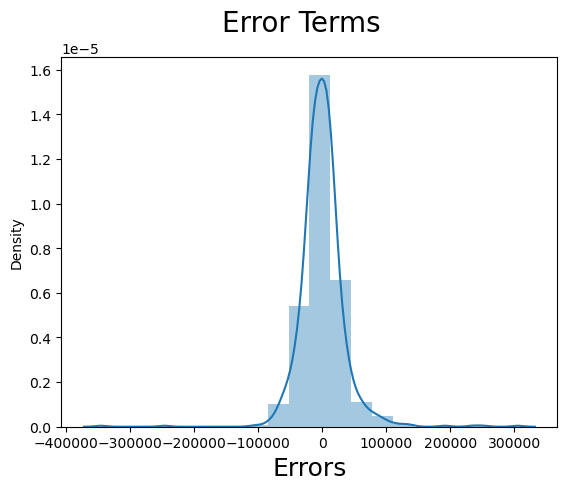

In [134]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Evaluate R2 of Train model

In [135]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.8

In [136]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1280785072407.437
1254441794.7183516
35418.09981800762


In [137]:
# Residual analysis
y_res = (y_train - y_train_cnst)

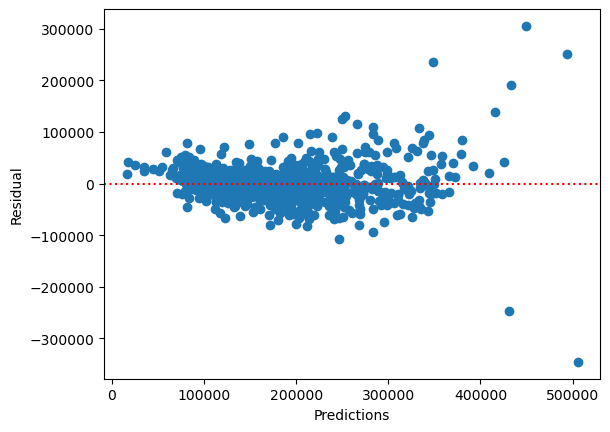

In [138]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

# Prediction and Evalution on Test Data

In [139]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [140]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [141]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [142]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'MSSubClass_75', 'MSSubClass_160', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageFinish_NA', 'GarageFinish_Unf'], dtype='object')

In [143]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [144]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [145]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     90.77
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          1.83e-148
Time:                        07:59:32   Log-Likelihood:                -5177.7
No. Observations:                 439   AIC:                         1.041e+04
Df Residuals:                     414   BIC:                         1.051e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.744e+05   4746.056     36.746      0.000    1.65e+05    1.84e+05
OverallQual           2.631e+04   2845.807      9.247      0.000    2.07e+04    3.19e+04
BsmtUnfSF            -1.091e+04   1887.412     -5.782      0.000   -1.46e+04   -7203.229
TotalBsmtSF           1.743e+04   3853.451      4.522      0.000    9850.883     2.5e+04
1stFlrSF               2.04e+04   3527.230      5.783      0.000    1.35e+04    2.73e+04
GarageCars            1.319e+04   2670.476      4.938      0.000    7937.447    1.84e+04
MSSubClass_75         2465.6303   2.39e+04      0.103      0.918   -4.46e+04    4.95e+04
MSSubClass_160       -3.985e+04   8938.003     -4.459      0.000   -5.74e+04   -2.23e+04
LotShape_IR3          2.576e+04   3.33e+04      0.773      0.440   -3.97e+04    9.13e+04
LotConfig_CulDSac     1.513e+04   6590.385      2.296      0.022    2178.688    2.81e+04
LotConfig_FR3        -7.599e+04   3.41e+04     -2.227      0.027   -1.43e+05   -8903.192
Neighborhood_Crawfor  2.737e+04   8162.728      3.353      0.001    1.13e+04    4.34e+04
Neighborhood_NoRidge  2.506e+04   1.48e+04      1.690      0.092   -4085.745    5.42e+04
Neighborhood_NridgHt  7.961e+04   9259.530      8.598      0.000    6.14e+04    9.78e+04
Neighborhood_Somerst  1.342e+04   7430.090      1.807      0.072   -1181.826     2.8e+04
Neighborhood_StoneBr  8.459e+04   1.05e+04      8.049      0.000    6.39e+04    1.05e+05
HouseStyle_1Story    -1.665e+04   4754.134     -3.502      0.001    -2.6e+04   -7301.872
HouseStyle_2.5Fin      5.06e+04   2.88e+04      1.758      0.079   -5965.065    1.07e+05
HouseStyle_2Story     3.057e+04   5623.329      5.436      0.000    1.95e+04    4.16e+04
Exterior1st_AsphShn  -2.567e-12   6.47e-12     -0.397      0.692   -1.53e-11    1.01e-11
Exterior1st_ImStucc   2.044e-12   4.83e-12      0.423      0.673   -7.46e-12    1.15e-11
Exterior2nd_AsphShn   1.138e+04   2.37e+04      0.480      0.631   -3.52e+04    5.79e+04
Exterior2nd_BrkFace   4786.2629   1.14e+04      0.420      0.675   -1.76e+04    2.72e+04
Exterior2nd_ImStucc   3.982e+04   2.48e+04      1.607      0.109   -8882.896    8.85e+04
Exterior2nd_Stucco   -4225.1999   1.39e+04     -0.304      0.762   -3.16e+04    2.31e+04
GarageFinish_NA       1.123e+04   9580.772      1.172      0.242   -7604.331    3.01e+04
GarageFinish_Unf     -1389.0736   4014.586     -0.346      0.730   -9280.588    6502.440
==============================================================================
Omnibus:                       86.673   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.103
Skew:                           0.666   Prob(JB):                    4.29e-119
Kurtosis:                       8.294   Cond. No.                     1.35e+16
==================

In [146]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Calculate r2 score of Test model

In [147]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.8

In [148]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

563265828569.6118
1283065668.7234893
35819.90604012648


In [149]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)


In [150]:
#check final VIf of columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Exterior1st_AsphShn,inf
20,Exterior2nd_AsphShn,inf
2,TotalBsmtSF,3.84
3,1stFlrSF,3.73
0,OverallQual,2.76
4,GarageCars,2.58
25,GarageFinish_Unf,2.11
17,HouseStyle_2Story,1.93
24,GarageFinish_NA,1.91
15,HouseStyle_1Story,1.89


Text(0, 0.5, 'y_pred')

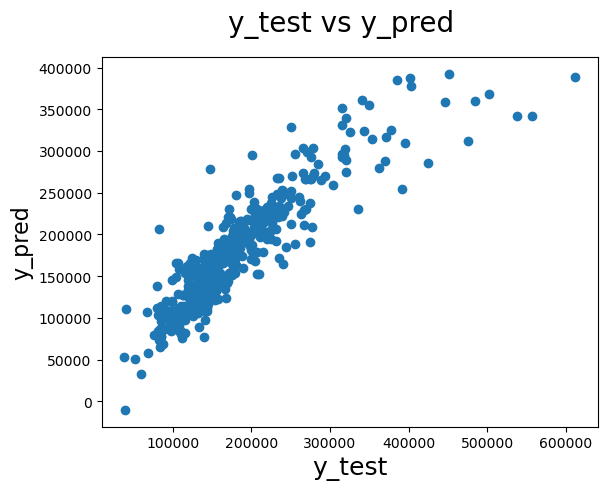

In [151]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [152]:
X_train_new.columns

Index(['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'MSSubClass_75', 'MSSubClass_160', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageFinish_NA', 'GarageFinish_Unf'], dtype='object')

In [153]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


# Final evalution
No of Variables = 21 i.e. OverallQual,BsmtUnfSF, TotalBsmtSF,1stFlrSF, 2ndFlrSF, MSSubClass_90, MSSubClass_160, MSZoning_RL, LotShape_IR3, LotConfig_CulDSac, Neighborhood_Crawfor , Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Veenker, Exterior1st_ImStucc, Exterior1st_Stucco, Exterior2nd_CmentBd , Exterior2nd_ImStucc, Exterior2nd_VinylSd

VIF < 5

p-value < 0.05

r2 score for Train Data set model = 0.80

r2 score for Test Data set model = 0.80


In [154]:
y_pred_train = lm.predict(X_train_lm)
#y_pred_test = lm.predict(X_test_lm)
y_pred_test = y_pred


metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


0.799308387495009
0.8006650326466278
1280785072407.437
563265828569.6118
1254441794.7183516
1283065668.7234893


# Ridge Regression

In [155]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [156]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [179]:
#Fitting Ridge model for alpha = 14 and printing coefficients which have been penalised
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)


[ -4880.91624851  21548.70396858  21734.02707093  29151.35433527
  11856.02423667  -9701.28745711 -26168.23729494  15135.58614886
  -2097.23087862  22823.52000553  22277.2456303  -37093.44901216
    899.04027868    487.23004378  -3666.27139923    487.23004378
   3746.97452635  15974.340541   -16180.99512418   9777.39982833
 -29598.8856975 ]


In [158]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


0.7949495185535614
0.7966759420963493
1308602748508.1143
574537902024.033
1281687314.8953128
1308742373.6310546


# Lasso

In [159]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [160]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 100}


In [161]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [162]:
lasso.coef_

array([ 29752.33881963,  -7408.55865768,   9965.86327529,  18557.61450841,
        13861.66992739,    455.20379374, -34338.90645242, -15172.40175533,
        13933.94696155,     -0.        ,  28403.30213902,  62486.06287171,
        44035.58510994,  21804.63432361,  14099.86476734,  -7908.77168534,
         4686.34310705,  21546.15907207,     -0.        ,     -0.        ,
           -0.        ,   6989.86790151,   7947.77658618, -19082.61409274,
        11647.32732438,  -8236.82399823])

In [163]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.7955501420987879
0.7949576650260691
1304769655230.0212
579393280739.3376
1277933060.9500697
1319802461.8208146


In [164]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.993084e-01,7.949495e-01,7.955501e-01
1,R2 Score (Test),8.006650e-01,7.966759e-01,7.949577e-01
2,RSS (Train),1.280785e+12,1.308603e+12,1.304770e+12
3,RSS (Test),5.632658e+11,5.745379e+11,5.793933e+11
4,MSE (Train),3.541810e+04,3.580066e+04,3.574819e+04
5,MSE (Test),3.581991e+04,3.617654e+04,3.632909e+04


# Lets observe the changes in the coefficients after regularization


In [165]:
betas = pd.DataFrame(index=X.columns)

In [166]:
betas.rows = X.columns

In [167]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [168]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,28753.578502,30131.514671,29752.338820
BsmtUnfSF,-7929.806893,-7506.712850,-7408.558658
TotalBsmtSF,10001.026224,10316.543596,9965.863275
1stFlrSF,18460.212744,18658.507558,18557.614508
GarageCars,14376.532799,14523.672722,13861.669927
MSSubClass_75,8355.119411,5518.994438,455.203794
MSSubClass_160,-39113.165004,-30328.992814,-34338.906452
LotShape_IR3,-25960.993328,-16149.425111,-15172.401755
LotConfig_CulDSac,15374.877870,14168.650343,13933.946962
LotConfig_FR3,-25243.964824,-7090.954269,-0.000000


# Que1: Double the values of Alpha for lasso & Ridge

In [169]:
#earlier for Ridge alpha = 7 now take 14
alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


[ 30878.6792842   -7290.77302677  10447.26417003  18705.68070931
  14681.15032363   3749.74747332 -24936.47238936 -11797.24271355
  12993.51930002  -4017.51120846  20454.15567129  43599.58445458
  32291.55047236  14382.43740253   7936.09859462  -8629.81686428
   6370.0077633   19950.81322482  -1856.8081159   -4386.56331163
  -1856.8081159    6369.27293748   8183.18625914 -13969.05086737
  11332.18207253  -9588.89390737]
0.7907477525689517
0.7929133877518661


In [170]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 30766.30279284  -7109.49340661   9515.12819102  18702.94492346
  13514.60475743      0.         -29460.38499356  -3935.6595833
  12415.55860815     -0.          23903.30048716  59328.64816476
  39759.25775275  17343.43451779   3650.50965001  -7258.7745406
      0.          20384.09398242     -0.             -0.
     -0.              0.              0.         -13561.15891763
   8551.8797032   -8912.67285454]
0.7921266467531181
0.7876309766113662


# Que2: Drop the Top 5 features and rebuild lasso

In [171]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'OverallQual'
                               , 'HouseStyle_2Story'], axis=1)

In [172]:
#Drop 5 features
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt','Neighborhood_Crawfor','OverallQual'
                               ,'HouseStyle_2Story'], axis=1)

In [173]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [174]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [175]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [176]:
lasso.coef_

array([ -3569.3054239 ,  20443.69799938,  21816.42164795,  28065.76153656,
            0.        ,     -0.        ,     -0.        ,   9679.83026213,
           -0.        ,  13476.55337821,      0.        , -34856.80832691,
            0.        ,      0.        ,     -0.        ,      0.        ,
            0.        ,      0.        ,     -0.        ,      0.        ,
       -31670.72703092])

In [177]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6530846640541276
0.6732439023237435


___After dropping the top 5 features model r2 score is 65% for Train and 67% for Test.___



In [178]:
X_train_new.columns

Index(['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'MSSubClass_75', 'MSSubClass_160', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageFinish_NA', 'GarageFinish_Unf'], dtype='object')

___Next top 5 features after drooping 5 main predictors 6
